C:\Users\polan\AppData\Local\Temp\ipykernel_15500\3154383594.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance[:10], y=importance.index[:10], palette='viridis')


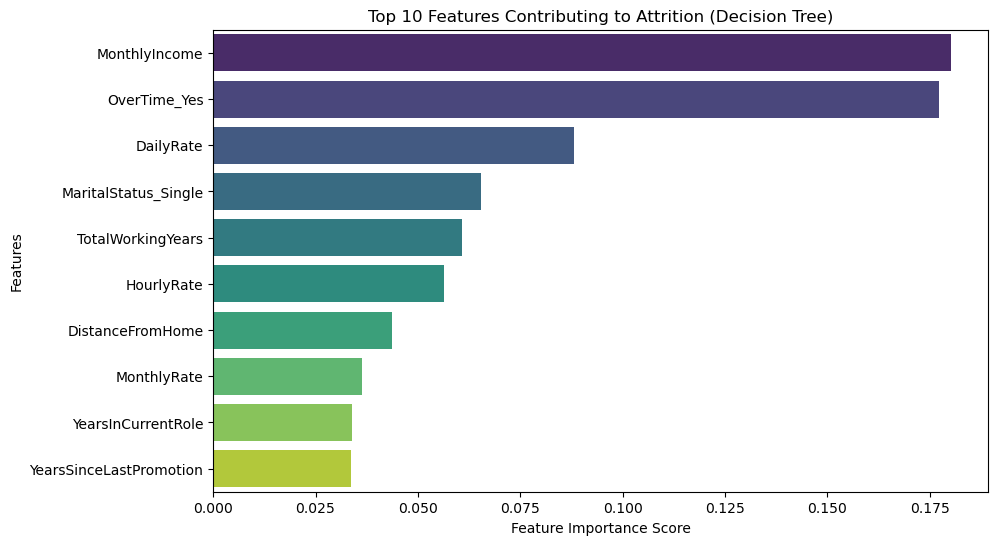

C:\Users\polan\AppData\Local\Programs\Orange\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\polan\AppData\Local\Temp\ipykernel_15500\3154383594.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Attrition', palette='viridis')


Top Positive Correlations with Attrition:
YearsSinceLastPromotion             0.230165
OverTime_Yes                        0.218062
NumCompaniesWorked                  0.215466
MaritalStatus_Single                0.133948
YearsAtCompany                      0.113892
BusinessTravel_Travel_Frequently    0.076628
Department_Sales                    0.074144
JobRole_Sales Representative        0.047558
StandardHours                       0.029745
EducationField_Technical Degree     0.029606
dtype: float64

Top Negative Correlations with Attrition:
MaritalStatus_Married               -0.063590
WorkLifeBalance                     -0.070567
Department_Research & Development   -0.079521
TrainingTimesLastYear               -0.103255
YearsWithCurrManager                -0.130438
JobInvolvement                      -0.132133
EnvironmentSatisfaction             -0.136550
JobSatisfaction                     -0.171228
StockOptionLevel                    -0.201177
YearsInCurrentRole                  

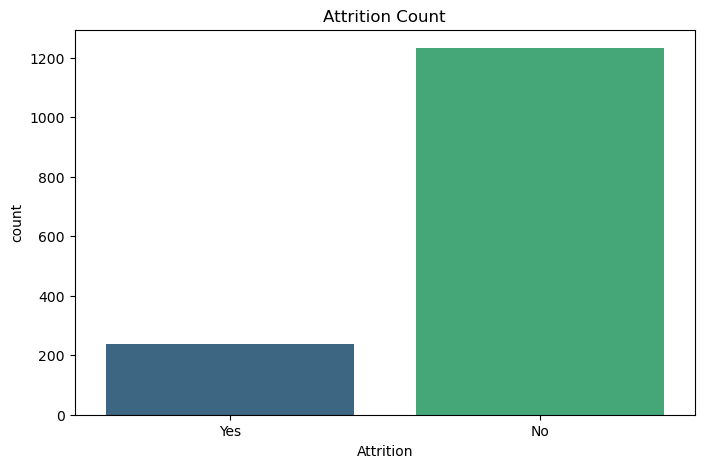

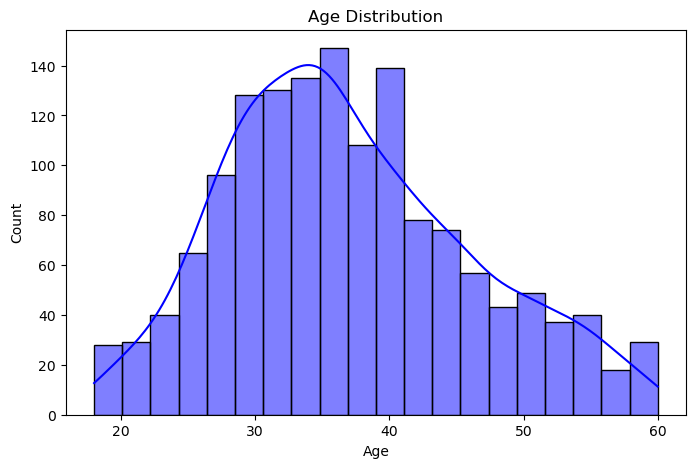

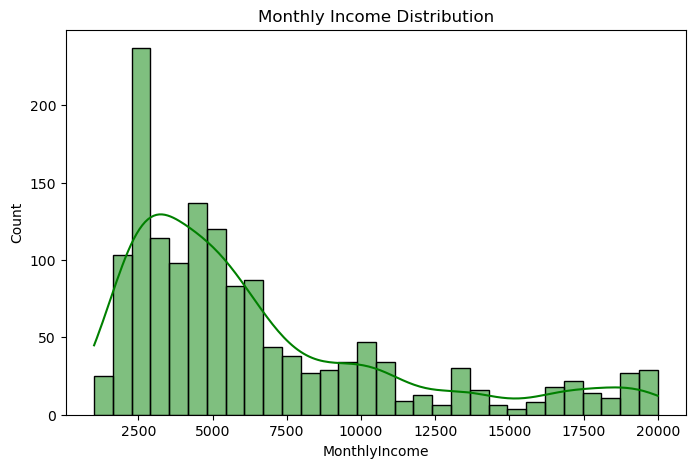

C:\Users\polan\AppData\Local\Temp\ipykernel_15500\3154383594.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='Age', palette='coolwarm')


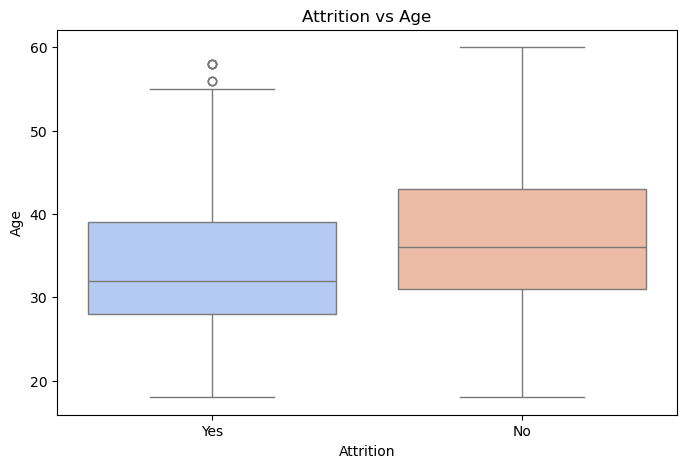

C:\Users\polan\AppData\Local\Temp\ipykernel_15500\3154383594.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='coolwarm')


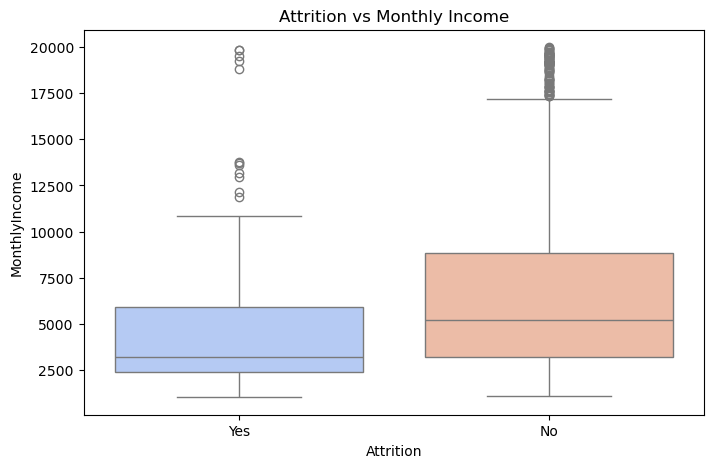

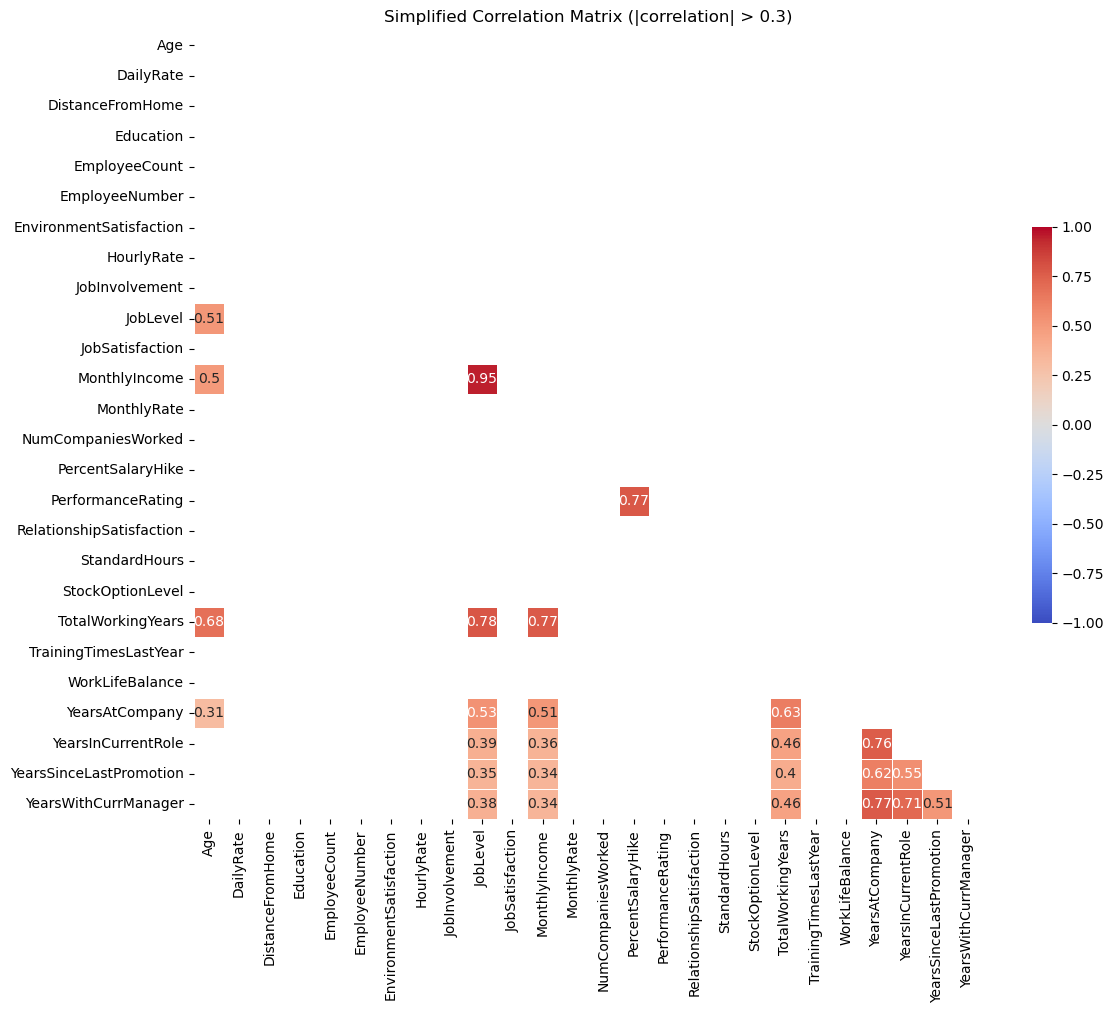

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Load and prepare the data
df = pd.read_csv('HR Employee Attrition.csv')
df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop('Attrition_Yes', axis=1, errors='ignore')
y = df_encoded['Attrition_Yes']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree analysis
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)
importance = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importance[:10], y=importance.index[:10], palette='viridis')
plt.title('Top 10 Features Contributing to Attrition (Decision Tree)')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

# Logistic Regression analysis
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
coefficients = pd.Series(lr_model.coef_[0], index=X.columns).sort_values(ascending=False)

print("Top Positive Correlations with Attrition:")
print(coefficients.head(10))
print("\nTop Negative Correlations with Attrition:")
print(coefficients.tail(10))

# Dataset overview
print("\nDataset Information:")
df.info()
print("\nFirst Few Rows:")
print(df.head())
print("\nMissing Values Count:")
print(df.isnull().sum())

# Visualizations
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Attrition', palette='viridis')
plt.title('Attrition Count')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, color='blue', bins=20)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df['MonthlyIncome'], kde=True, color='green', bins=30)
plt.title('Monthly Income Distribution')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Attrition', y='Age', palette='coolwarm')
plt.title('Attrition vs Age')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='coolwarm')
plt.title('Attrition vs Monthly Income')
plt.show()

# plt.figure(figsize=(10, 8))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Matrix')
# plt.show()
plt.figure(figsize=(12, 10))

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate and filter correlations
corr_matrix = numeric_df.corr()
high_corr = corr_matrix[abs(corr_matrix) > 0.3]

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(high_corr, dtype=bool))

# Create the heatmap
sns.heatmap(high_corr, 
            mask=mask, 
            annot=True, 
            cmap='coolwarm', 
            vmin=-1, 
            vmax=1, 
            center=0,
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5})

plt.title('Simplified Correlation Matrix (|correlation| > 0.3)')
plt.tight_layout()
plt.show()

